<div style="font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; text-align: center;">
    <h1 style="color: #2E86C1; font-size: 49px; background-color: #e0f7fa; padding: 10px;">Assignment 3</h1>
    <h2 style="color: #C0392B; font-size: 28px;">Bushra Shahbaz</h2>
    <h2 style="color: #C0392B; font-size: 28px;">Roll No: BSDSF21M020</h2>


# **Program 1: Play with Colors - Image Segmentation**

## 🎨 **Description**

In this program, we perform **image segmentation** to extract specific colors (green and red) from an image using **color-based thresholding** techniques in the **HSV (Hue, Saturation, Value)** color space. The goal is to isolate regions of interest (ROI) where the **green** and **red** colors are prominent, and display these regions separately on **white backgrounds** for better visualization.

---

## ⚙️ **How the Problem is Solved:**

### 1. **Image Loading and Preprocessing:**
   - **Loading the Image:** 
     We start by loading the image using OpenCV’s `cv2.imread()` function. If the image path is incorrect or the image is missing, an error message is displayed.
   - **Resizing for Consistency:**
     The image is resized to **500x500 pixels** to ensure consistency in processing across different image sizes.

### 2. **Color Space Conversion:**
   - The image is converted from **BGR** (Blue, Green, Red) to **HSV** color space using `cv2.cvtColor()`. The **HSV color space** is preferred for color segmentation because it decouples the intensity (brightness) of the image from the color, making it easier to isolate specific colors such as green and red.

### 3. **Green Color Extraction (Output 1):**
   - **HSV Range for Green:**
     A mask is created using `cv2.inRange()`, which identifies the pixels within the specific HSV range corresponding to the **green color**.
   - **Green Areas Extraction:**
     Green regions are preserved while the rest of the image is turned **white** using **NumPy array operations**.

### 4. **Red Color Extraction (Output 2):**
   - **HSV Range for Red:**
     Since **red** spans across two parts of the Hue spectrum (0-10 and 170-180 degrees), two separate HSV ranges are defined for red.
   - **Red Areas Extraction:**
     A mask is created for both red ranges, and the red areas are preserved while turning the rest of the image **white**.

### 5. **Combined Extraction (Output 3):**
   - **Combining Green and Red:**
     A combined mask is generated using **bitwise AND** operation (`cv2.bitwise_and`) between the green and red masks. This ensures that only the regions where both green and red overlap are extracted.
   - **Result:**
     The combined areas (green + red) are preserved while the rest of the image is set to **white**.

### 6. **Result Display:**
   - The processed images are saved using `cv2.imwrite()` and displayed using `cv2.imshow()` for visualization.

---

## 📸 **For Which Images Does It Work:**

- **Images with Distinct Green and Red Regions:**
  - This technique works well for images where green and red areas are clearly distinguishable (e.g., fruits, vegetables, peppers, etc.).
  - It is highly effective in **controlled lighting** conditions where the colors are distinct and not affected by blending with other colors.

- **Simple Images with Clear Color Contrast:**
  - This method is most effective in cases where the image has clearly defined regions of green and red, making it easier to separate these colors.

---

## 🚫 **For Which Images Does It Not Work:**

- **Images with Complex Backgrounds:**
  - If the green or red colors are similar to other colors in the image (e.g., yellow, brown, purple), the segmentation might mistakenly include those areas, leading to incorrect extractions.
  
- **Poor Lighting or Shadows:**
  - Low-light images or images with shadows may cause issues in correctly identifying green or red areas, leading to inaccurate segmentation.
  
- **Overlapping Colors:**
  - In images where green and red areas blend or overlap, the segmentation may not produce clean results, especially in areas where both colors are present.

---

## 📑 **Code Explanation:**
Below is the Python code implementing this segmentation process:

```python
import cv2
import numpy as np

# Load the original input image
image = cv2.imread('peppers.jpg')  # Replace with your image path
if image is None:
    print("Error: Image not found!")
    exit()
image = cv2.resize(image, (500, 500))  # Resize for consistency (optional)

# Convert to HSV color space for better color segmentation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Output 1: Extract green areas with the original color on white background
lower_green = np.array([40, 40, 40])  # Lower HSV bound for green
upper_green = np.array([80, 255, 255])  # Upper HSV bound for green
green_mask = cv2.inRange(hsv, lower_green, upper_green)

# Create green output: Keep green areas, make the rest white
green_output = image.copy()
green_output[np.where(green_mask == 0)] = [255, 255, 255]  # Set background to white

# Output 2: Extract red areas with the original color on white background
lower_red1 = np.array([0, 50, 50])  # Lower HSV bound for red (first range)
upper_red1 = np.array([10, 255, 255])  # Upper HSV bound for red (first range)
lower_red2 = np.array([170, 50, 50])  # Lower HSV bound for red (second range)
upper_red2 = np.array([180, 255, 255])  # Upper HSV bound for red (second range)
red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Create red output: Keep red areas, make the rest white
red_output = image.copy()
red_output[np.where(red_mask == 0)] = [255, 255, 255]  # Set background to white

# Output 3: Highlight all segmented areas (green + red) on white background
combined_mask = cv2.bitwise_and(green_mask, red_mask)  # Use AND instead of OR
combined_output = image.copy()
combined_output[np.where(combined_mask == 0)] = [255, 255, 255]  # Set background to white

# Save and display the outputs
cv2.imwrite('output1_green.jpg', green_output)
cv2.imwrite('output2_red.jpg', red_output)
cv2.imwrite('output3_combined.jpg', combined_output)

cv2.imshow('Original Image', image)
cv2.imshow('Output 1 - Green ROI (White Background)', green_output)
cv2.imshow('Output 2 - Red ROI (White Background)', red_output)
cv2.imshow('Output 3 - Combined ROI (White Background)', combined_output)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

---

## 📚 **Libraries Used:**

- **OpenCV (`cv2`)**: This library is used for image processing tasks such as loading the image, converting the color space, applying masks, and displaying images.
- **NumPy (`np`)**: This library is used for array manipulations, particularly for operations like setting pixel values and performing logical operations.

---

## 💡 **Conclusion:**

This program provides a simple yet effective method to perform color-based segmentation on images, isolating green and red regions and displaying them on a white background. It works well for images with distinct colors but may face challenges with complex backgrounds or overlapping colors. 

By experimenting with different color ranges in the HSV color space, you can adapt this method to other color segmentation tasks as well.
---

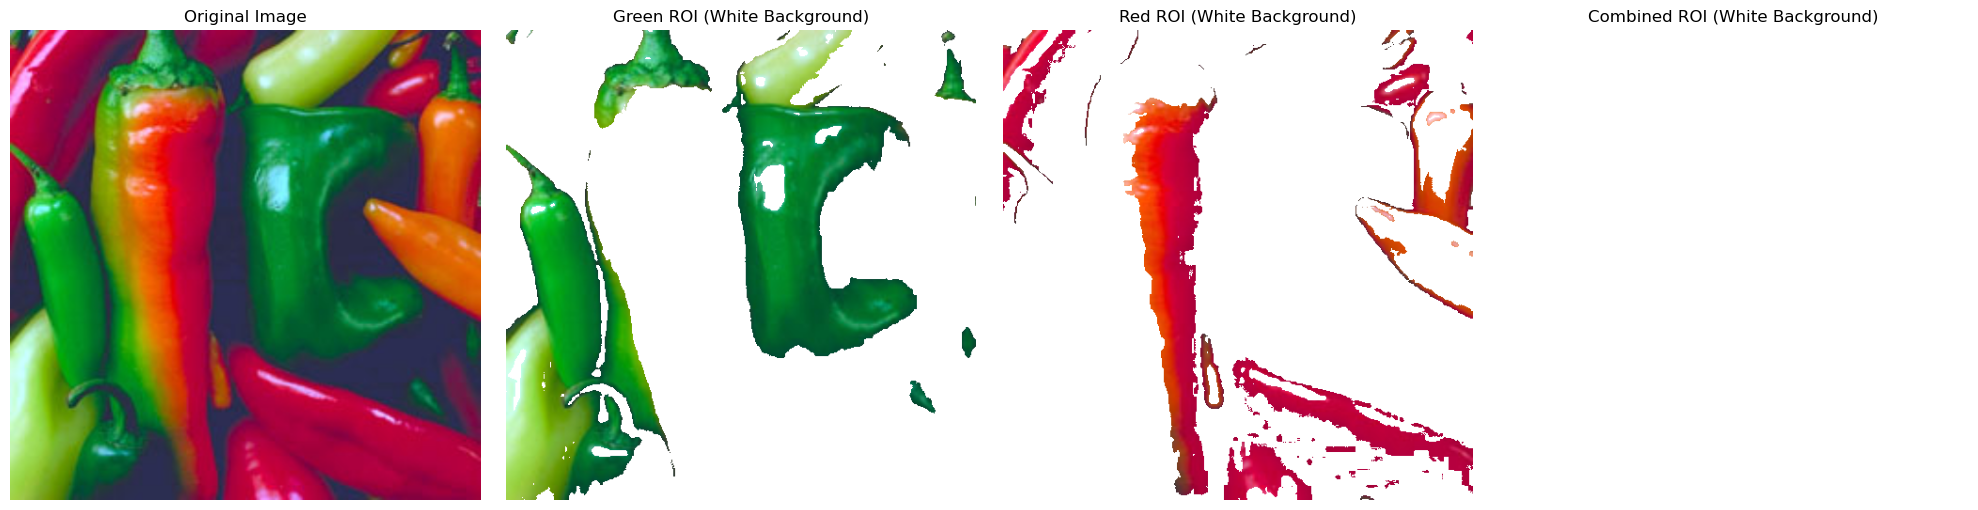

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original input image
image = cv2.imread('peppers.png')  # Replace with your image path
if image is None:
    print("Error: Image not found!")
    exit()
image = cv2.resize(image, (500, 500))  # Resize for consistency (optional)

# Convert to HSV color space for better color segmentation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Output 1: Extract green areas with the original color on white background
lower_green = np.array([40, 40, 40])  # Lower HSV bound for green
upper_green = np.array([80, 255, 255])  # Upper HSV bound for green
green_mask = cv2.inRange(hsv, lower_green, upper_green)

# Create green output: Keep green areas, make the rest white
green_output = image.copy()
green_output[np.where(green_mask == 0)] = [255, 255, 255]  # Set background to white

# Output 2: Extract red areas with the original color on white background
lower_red1 = np.array([0, 50, 50])  # Lower HSV bound for red (first range)
upper_red1 = np.array([10, 255, 255])  # Upper HSV bound for red (first range)
lower_red2 = np.array([170, 50, 50])  # Lower HSV bound for red (second range)
upper_red2 = np.array([180, 255, 255])  # Upper HSV bound for red (second range)
red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Create red output: Keep red areas, make the rest white
red_output = image.copy()
red_output[np.where(red_mask == 0)] = [255, 255, 255]  # Set background to white

# Output 3: Highlight all segmented areas (green + red) on white background
combined_mask = cv2.bitwise_and(green_mask, red_mask)
combined_output = image.copy()
combined_output[np.where(combined_mask == 0)] = [255, 255, 255]  # Set background to white

# Display the images as subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the output for green regions
axes[1].imshow(cv2.cvtColor(green_output, cv2.COLOR_BGR2RGB))
axes[1].set_title('Green ROI (White Background)')
axes[1].axis('off')

# Plot the output for red regions
axes[2].imshow(cv2.cvtColor(red_output, cv2.COLOR_BGR2RGB))
axes[2].set_title('Red ROI (White Background)')
axes[2].axis('off')

# Plot the combined output for both green and red regions
axes[3].imshow(cv2.cvtColor(combined_output, cv2.COLOR_BGR2RGB))
axes[3].set_title('Combined ROI (White Background)')
axes[3].axis('off')

plt.tight_layout()
plt.show()


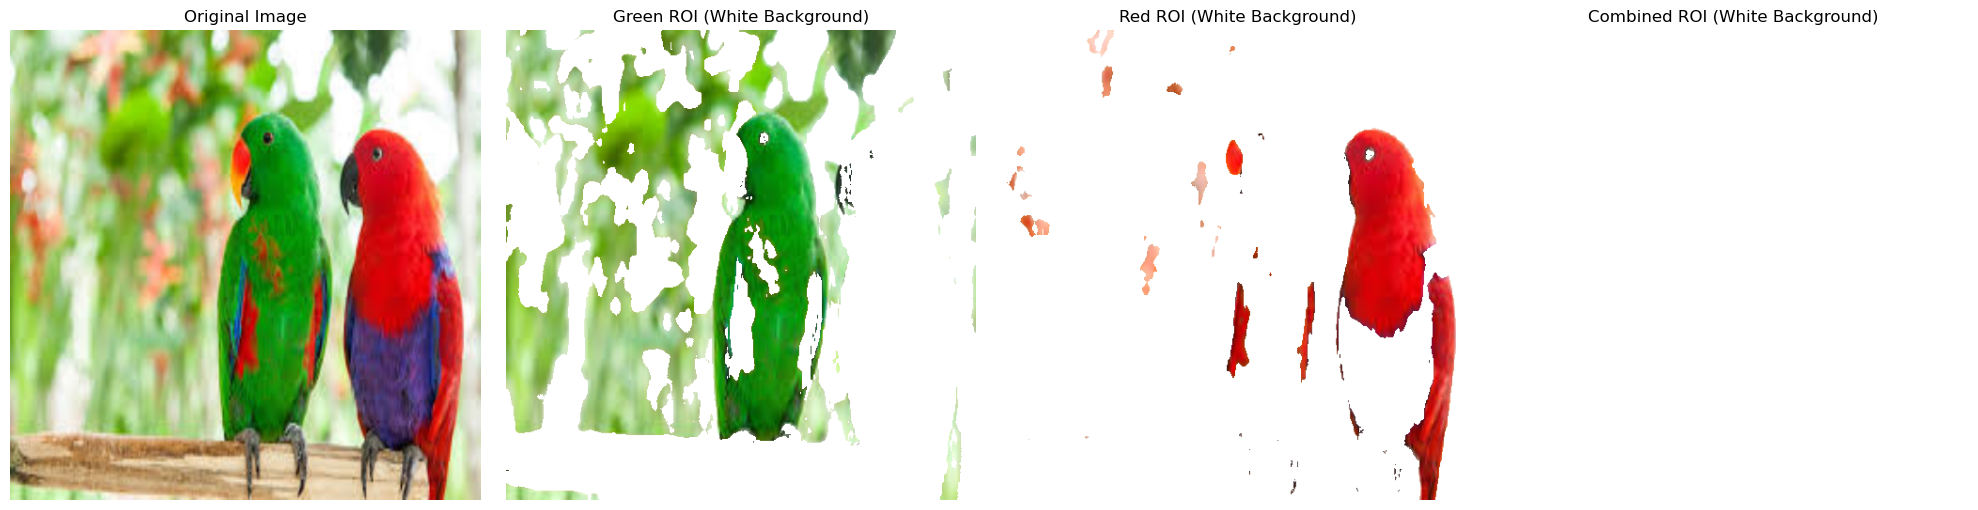

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original input image
image = cv2.imread('parrots.jpg')  # Replace with your image path
if image is None:
    print("Error: Image not found!")
    exit()
image = cv2.resize(image, (500, 500))  # Resize for consistency (optional)

# Convert to HSV color space for better color segmentation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Output 1: Extract green areas with the original color on white background
lower_green = np.array([40, 40, 40])  # Lower HSV bound for green
upper_green = np.array([80, 255, 255])  # Upper HSV bound for green
green_mask = cv2.inRange(hsv, lower_green, upper_green)

# Create green output: Keep green areas, make the rest white
green_output = image.copy()
green_output[np.where(green_mask == 0)] = [255, 255, 255]  # Set background to white

# Output 2: Extract red areas with the original color on white background
lower_red1 = np.array([0, 50, 50])  # Lower HSV bound for red (first range)
upper_red1 = np.array([10, 255, 255])  # Upper HSV bound for red (first range)
lower_red2 = np.array([170, 50, 50])  # Lower HSV bound for red (second range)
upper_red2 = np.array([180, 255, 255])  # Upper HSV bound for red (second range)
red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Create red output: Keep red areas, make the rest white
red_output = image.copy()
red_output[np.where(red_mask == 0)] = [255, 255, 255]  # Set background to white

# Output 3: Highlight all segmented areas (green + red) on white background
combined_mask = cv2.bitwise_and(green_mask, red_mask)
combined_output = image.copy()
combined_output[np.where(combined_mask == 0)] = [255, 255, 255]  # Set background to white

# Display the images as subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the output for green regions
axes[1].imshow(cv2.cvtColor(green_output, cv2.COLOR_BGR2RGB))
axes[1].set_title('Green ROI (White Background)')
axes[1].axis('off')

# Plot the output for red regions
axes[2].imshow(cv2.cvtColor(red_output, cv2.COLOR_BGR2RGB))
axes[2].set_title('Red ROI (White Background)')
axes[2].axis('off')

# Plot the combined output for both green and red regions
axes[3].imshow(cv2.cvtColor(combined_output, cv2.COLOR_BGR2RGB))
axes[3].set_title('Combined ROI (White Background)')
axes[3].axis('off')

plt.tight_layout()
plt.show()


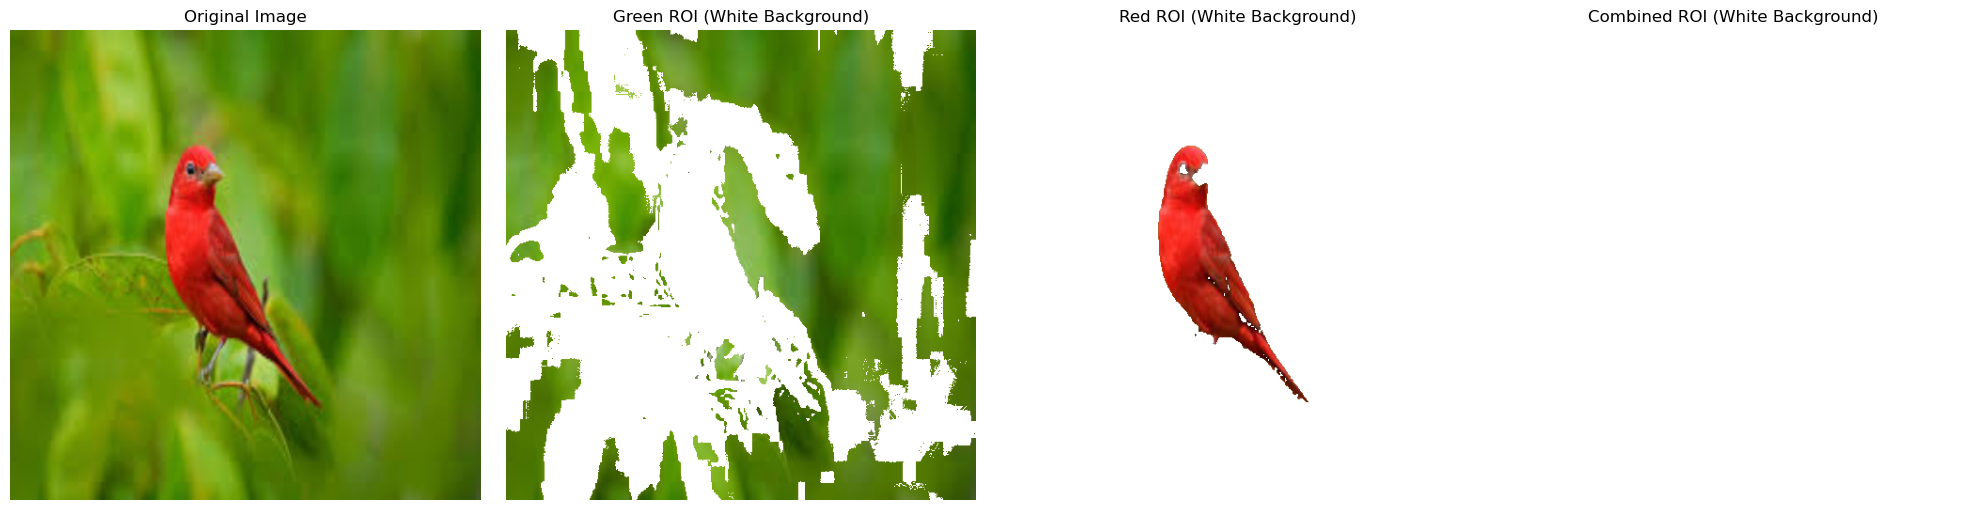

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original input image
image = cv2.imread('parrot.jpg')  # Replace with your image path
if image is None:
    print("Error: Image not found!")
    exit()
image = cv2.resize(image, (500, 500))  # Resize for consistency (optional)

# Convert to HSV color space for better color segmentation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Output 1: Extract green areas with the original color on white background
lower_green = np.array([40, 40, 40])  # Lower HSV bound for green
upper_green = np.array([80, 255, 255])  # Upper HSV bound for green
green_mask = cv2.inRange(hsv, lower_green, upper_green)

# Create green output: Keep green areas, make the rest white
green_output = image.copy()
green_output[np.where(green_mask == 0)] = [255, 255, 255]  # Set background to white

# Output 2: Extract red areas with the original color on white background
lower_red1 = np.array([0, 50, 50])  # Lower HSV bound for red (first range)
upper_red1 = np.array([10, 255, 255])  # Upper HSV bound for red (first range)
lower_red2 = np.array([170, 50, 50])  # Lower HSV bound for red (second range)
upper_red2 = np.array([180, 255, 255])  # Upper HSV bound for red (second range)
red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Create red output: Keep red areas, make the rest white
red_output = image.copy()
red_output[np.where(red_mask == 0)] = [255, 255, 255]  # Set background to white

# Output 3: Highlight all segmented areas (green + red) on white background
combined_mask = cv2.bitwise_and(green_mask, red_mask)
combined_output = image.copy()
combined_output[np.where(combined_mask == 0)] = [255, 255, 255]  # Set background to white

# Display the images as subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the output for green regions
axes[1].imshow(cv2.cvtColor(green_output, cv2.COLOR_BGR2RGB))
axes[1].set_title('Green ROI (White Background)')
axes[1].axis('off')

# Plot the output for red regions
axes[2].imshow(cv2.cvtColor(red_output, cv2.COLOR_BGR2RGB))
axes[2].set_title('Red ROI (White Background)')
axes[2].axis('off')

# Plot the combined output for both green and red regions
axes[3].imshow(cv2.cvtColor(combined_output, cv2.COLOR_BGR2RGB))
axes[3].set_title('Combined ROI (White Background)')
axes[3].axis('off')

plt.tight_layout()
plt.show()


# 🌈 **Program 2: Color Dominance and Background Conversion**

This program processes an image and emphasizes the color dominance in **Green**, **Blue**, and **Red** channels. The goal is to isolate the most dominant color in the image while converting the others to grayscale, effectively highlighting one color at a time.

---

### 📸 **Step 1: Load and Resize the Image**

First, we load the original image and resize it for better visualization. The image is then processed in separate color channels (Blue, Green, Red) to extract the most dominant color.

```python
# Load the original image
image = cv2.imread('grid.png')

# Resize the image (optional)
image = cv2.resize(image, (1000, 500))
```

- The **original image** is loaded using `cv2.imread()` and resized to a size of 1000x500 pixels for better display.
  
---

### 🎨 **Step 2: Convert the Image to Grayscale**

To simplify the background and assist with the color dominance process, the image is converted to grayscale.

```python
# Convert the image to grayscale for background (this will help with gray shading)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
```

- **Grayscale** conversion is performed using `cv2.cvtColor()`. This allows us to add a neutral gray background where non-dominant colors will be muted.

---

### 🔴 **Step 3: Separate the Color Channels**

We separate the **Blue**, **Green**, and **Red** channels of the image to analyze their dominance.

```python
# Separate the color channels
blue, green, red = cv2.split(image)
```

- Using `cv2.split()`, we separate the image into its **blue**, **green**, and **red** components, which will be used to determine the most dominant color.

---

### 🟢 **Step 4: Output 1 - Green Dominant**

In this step, we identify areas where the **green** color is the most dominant compared to red and blue. We keep these regions in full color and convert the rest to grayscale.

```python
# Output 1: Green Dominant - Retain green, others in grayscale
output1 = np.zeros_like(image)  # Create a black image with the same shape
mask = (green > red + threshold) & (green > blue + threshold)  # Green is dominant
output1[:, :, 1] = np.where(mask, green, 0)  # Retain green where it's dominant
output1 = cv2.add(output1, cv2.merge([gray, gray, gray]))  # Add grayscale to non-green regions
```

- **Green Dominant** areas are retained using a mask where **green** values are higher than both **red** and **blue**. 
- Non-dominant regions are turned into grayscale using `cv2.add()`.

---

### 🔵 **Step 5: Output 2 - Blue Dominant**

Here, we isolate the **blue** color and discard the rest, turning it into grayscale.

```python
# Output 2: Blue Dominant - Retain blue, others in grayscale
output2 = np.zeros_like(image)  # Create a black image with the same shape
mask = (blue > red + threshold) & (blue > green + threshold)  # Blue is dominant
output2[:, :, 0] = np.where(mask, blue, 0)  # Retain blue where it's dominant
output2 = cv2.add(output2, cv2.merge([gray, gray, gray]))  # Add grayscale to non-blue regions
```

- **Blue Dominant** areas are retained by creating a mask where **blue** values exceed **red** and **green** values.
- Non-blue regions are converted to grayscale.

---

### 🟥 **Step 6: Output 3 - Red Dominant**

In this step, we focus on isolating the **red** color and converting the rest of the image to grayscale.

```python
# Output 3: Red Dominant - Retain red, others in grayscale
output3 = np.zeros_like(image)  # Create a black image with the same shape
mask = (red > green + threshold) & (red > blue + threshold)  # Red is dominant
output3[:, :, 2] = np.where(mask, red, 0)  # Retain red where it's dominant
output3 = cv2.add(output3, cv2.merge([gray, gray, gray]))  # Add grayscale to non-red regions
```

- **Red Dominant** areas are kept while other regions are converted to grayscale using the same logic as for the other dominant colors.

---

### 🖼️ **Step 7: Display the Results**

Finally, we display all three outputs (Green Dominant, Blue Dominant, and Red Dominant) along with the original image using **Matplotlib**.

```python
# Plot results
outputs = [image, output1, output2, output3]
titles = ["Original", "Output 1 (Green Dominant)", "Output 2 (Blue Dominant)", "Output 3 (Red Dominant)"]

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(outputs[i], cv2.COLOR_BGR2RGB))  # Convert to RGB for display
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
```

- The **original image** and all **output images** are displayed using `plt.imshow()`, converting the images from BGR to RGB for proper color display in **Matplotlib**.
- The **titles** for each subplot are set, and the axis is turned off for a cleaner display.

---

### ✨ **Summary of Outputs**

- **Output 1 - Green Dominant**: Highlights the **green** color, with other regions turned to grayscale. Ideal for showcasing scenes where green is prominent (e.g., forests, nature).
- **Output 2 - Blue Dominant**: Focuses on **blue** areas, turning the rest of the image to grayscale. Useful for emphasizing blue skies or oceans.
- **Output 3 - Red Dominant**: Emphasizes the **red** color, with the rest of the image in grayscale. This is great for highlighting objects like red flowers, vehicles, etc.

This approach of **color dominance** allows us to emphasize specific hues in an image, helping draw attention to key features based on color contrast. 🌟
```

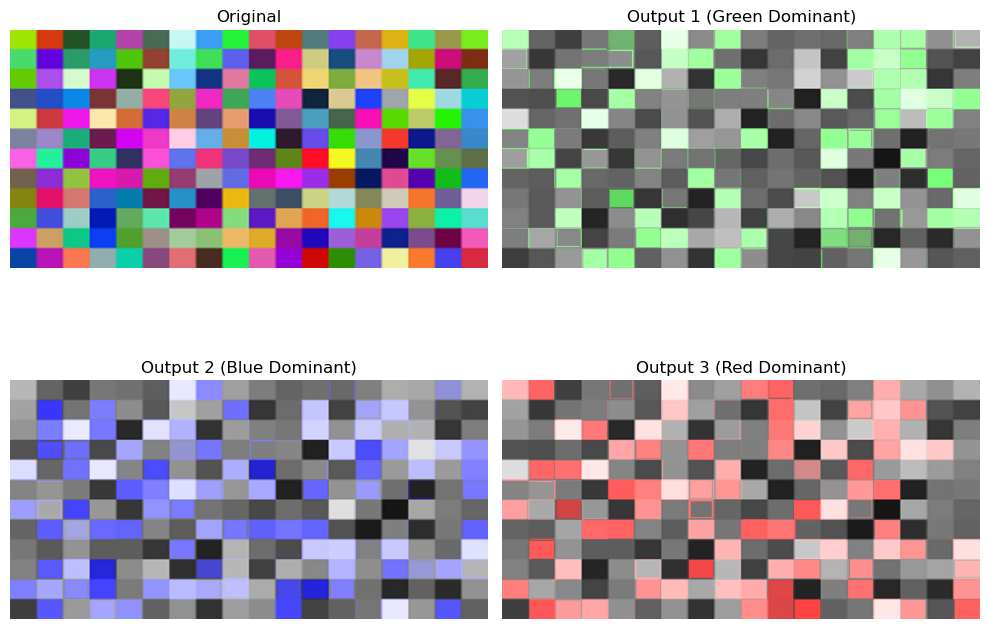

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread('grid.png')

# Resize the image (optional)
image = cv2.resize(image, (1000, 500))

# Convert the image to grayscale for background (this will help with gray shading)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Separate the color channels
blue, green, red = cv2.split(image)

# Threshold value to make the color dominance selective
threshold = 120  # You can adjust this threshold for stronger or weaker dominance

# Output 1: Green Dominant - Retain green, others in grayscale
output1 = np.zeros_like(image)  # Create a black image with the same shape
# Retain pixels where green is significantly dominant over red and blue
mask = (green > red + threshold) & (green > blue + threshold)  # Green is dominant
output1[:, :, 1] = np.where(mask, green, 0)  # Retain green where it's dominant
output1 = cv2.add(output1, cv2.merge([gray, gray, gray]))  # Add grayscale to non-green regions

# Output 2: Blue Dominant - Retain blue, others in grayscale
output2 = np.zeros_like(image)  # Create a black image with the same shape
# Retain pixels where blue is significantly dominant over red and green
mask = (blue > red + threshold) & (blue > green + threshold)  # Blue is dominant
output2[:, :, 0] = np.where(mask, blue, 0)  # Retain blue where it's dominant
output2 = cv2.add(output2, cv2.merge([gray, gray, gray]))  # Add grayscale to non-blue regions

# Output 3: Red Dominant - Retain red, others in grayscale
output3 = np.zeros_like(image)  # Create a black image with the same shape
# Retain pixels where red is significantly dominant over green and blue
mask = (red > green + threshold) & (red > blue + threshold)  # Red is dominant
output3[:, :, 2] = np.where(mask, red, 0)  # Retain red where it's dominant
output3 = cv2.add(output3, cv2.merge([gray, gray, gray]))  # Add grayscale to non-red regions

# Plot results
outputs = [image, output1, output2, output3]
titles = ["Original", "Output 1 (Green Dominant)", "Output 2 (Blue Dominant)", "Output 3 (Red Dominant)"]

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(outputs[i], cv2.COLOR_BGR2RGB))  # Convert to RGB for display
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


# 🚦 Program 3 : **Traffic Light Detection using OpenCV and Python**

In this notebook, we will build a **traffic light detection system** using **OpenCV** to classify images into one of the following categories based on the traffic light color:
- **Stop** (Red Light)
- **Wait** (Yellow Light)
- **Go** (Green Light)

This will be achieved by detecting the traffic light's color in the image using **color filtering** and **contour detection** techniques.

---

## 🧑‍💻 **Technologies Used**

- **Python**: The programming language used for image processing and computation.
- **OpenCV**: Open-source computer vision library used for image reading, manipulation, and color filtering.
- **NumPy**: Used for numerical operations, such as defining color ranges for filtering.
- **Matplotlib**: Used for visualizing the results of the traffic light detection.
- **HSV Color Space**: We use HSV (Hue, Saturation, Value) because it allows us to easily filter and detect specific colors such as red, yellow, and green.

---

## 📝 **Code Explanation**

Let's break down the code step by step to understand how traffic lights are detected and classified.

### 1. **Loading and Preprocessing the Image**

```python
# Load the input image
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Image at {image_path} not found.")
    return None, None
```

- The image is loaded from the specified `image_path` using OpenCV's `cv2.imread()`.
- If the image cannot be found, the function returns `None`.

### 2. **Resizing the Image**

```python
image = cv2.resize(image, (300, 300))
```

- To ensure consistent processing, the image is resized to a fixed size of 300x300 pixels. This makes the subsequent processing steps more efficient.

### 3. **Converting to HSV Color Space**

```python
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
```

- The image is converted from the default **BGR** color space to **HSV**. HSV is a color space that is more suitable for color detection because the hue (color) component is separate from brightness.

### 4. **Defining Color Ranges for Red, Yellow, and Green**

```python
red_lower1 = np.array([0, 120, 100])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([160, 120, 100])
red_upper2 = np.array([180, 255, 255])
yellow_lower = np.array([20, 120, 100])
yellow_upper = np.array([30, 255, 255])
green_lower = np.array([40, 120, 100])
green_upper = np.array([70, 255, 255])
```

- We define color ranges for **red**, **yellow**, and **green** using lower and upper bounds in the HSV space. The values were chosen based on the typical appearance of these colors in traffic lights.

### 5. **Creating Masks for Each Color**

```python
# Create masks for each color
red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
green_mask = cv2.inRange(hsv, green_lower, green_upper)
```

- Masks are created for each color by using the `cv2.inRange()` function. This function isolates pixels within the defined HSV ranges and creates binary masks for each color.

### 6. **Finding Contours for Each Mask**

```python
contours_red, _ = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_yellow, _ = cv2.findContours(yellow_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_green, _ = cv2.findContours(green_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
```

- **Contours** are detected in the binary masks using `cv2.findContours()`. The presence of contours in a mask indicates the presence of a traffic light of that color.

### 7. **Determining the Traffic Light Status**

```python
command = "No traffic light detected"
if len(contours_red) > 0:
    command = "Stop"  # Red light means Stop
elif len(contours_yellow) > 0:
    command = "Wait"  # Yellow light means Wait
elif len(contours_green) > 0:
    command = "Go"  # Green light means Go
```

- Based on the number of contours detected in each color mask, we determine the traffic light status. If contours are detected for red, the command is "Stop", for yellow "Wait", and for green "Go".
- If no contours are found, it means no traffic light is detected.

### 8. **Visualizing the Detected Traffic Light**

```python
if command != "No traffic light detected":
    output = cv2.bitwise_and(image, image, mask=light_mask)
    cv2.putText(image, command, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
```

- If a traffic light is detected, the `cv2.bitwise_and()` function highlights the detected traffic light area.
- The command ("Stop", "Wait", or "Go") is overlaid on the image for better visualization.

---

## 🖼️ **Testing the Code**

Let's test the traffic light detection on several images. We will load and classify images with different traffic light colors and display them with the detected command.

```python
# List of image paths to test
image_paths = ['red.png', 'red1.jpg', 'yellow.jpg', 'yellow1.png', 'green.jpg', 'green1.jpg']

# Set up subplots: 3 rows, 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # 3 rows, 2 columns

for i, ax in enumerate(axes.flat):
    if i < len(image_paths):
        image, output, command = detect_traffic_light(image_paths[i])
        if image is not None:
            ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
            ax.set_title(f"Image {i + 1} - {command}")
            ax.axis('off')
        else:
            ax.set_title(f"Error: Image {i + 1}")
            ax.axis('off')

plt.tight_layout()
plt.show()
```

- The images are displayed in a 3x2 grid, and the detected traffic light command is shown in the title of each subplot.

---

## 🎯 **Conclusion**

This notebook demonstrates how to use **OpenCV** and **Python** to detect traffic lights in images and classify them based on their color. The system can detect red, yellow, and green lights, and display the corresponding action (Stop, Wait, Go).

---

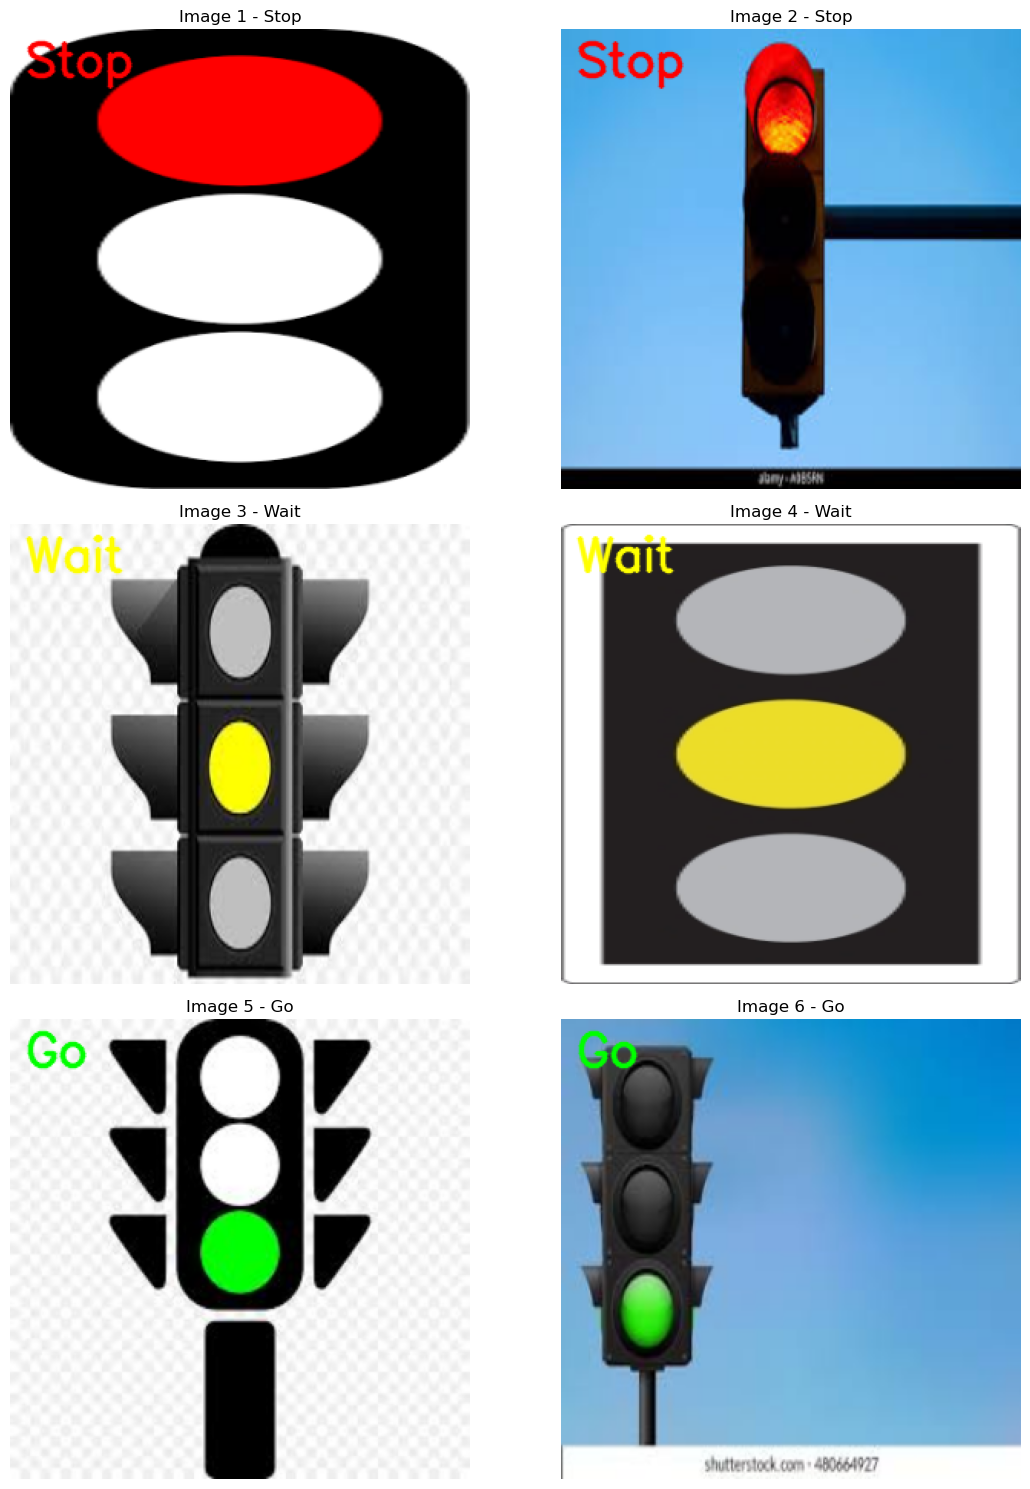

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_traffic_light(image_path):
    # Load the input image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image at {image_path} not found.")
        return None, None
    # Resize for consistent processing (optional)
    image = cv2.resize(image, (300, 300))
    
    # Convert the image to HSV color space for better color segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges for red, yellow, and green lights
    red_lower1 = np.array([0, 120, 100])  # First red range
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([160, 120, 100])  # Second red range
    red_upper2 = np.array([180, 255, 255])
    yellow_lower = np.array([20, 120, 100])
    yellow_upper = np.array([30, 255, 255])
    green_lower = np.array([40, 120, 100])
    green_upper = np.array([70, 255, 255])

    # Create masks for each color
    red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
    red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)  # Combine both red masks
    yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
    green_mask = cv2.inRange(hsv, green_lower, green_upper)

    # Find contours for each mask
    contours_red, _ = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_yellow, _ = cv2.findContours(yellow_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_green, _ = cv2.findContours(green_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Detect the light color and determine the command
    command = "No traffic light detected"
    color = (255, 255, 255)  # Default color for "No traffic light"
    light_mask = None
    if len(contours_red) > 0:
        command = "Stop"  # Red light means "Stop"
        color = (0, 0, 255)  # Red color for visualization
        light_mask = red_mask
    elif len(contours_yellow) > 0:
        command = "Wait"  # Yellow light means "Wait"
        color = (0, 255, 255)  # Yellow color
        light_mask = yellow_mask
    elif len(contours_green) > 0:
        command = "Go"  # Green light means "Go"
        color = (0, 255, 0)  # Green color
        light_mask = green_mask

    # Visualize detected traffic light
    output = None
    if command != "No traffic light detected":
        output = cv2.bitwise_and(image, image, mask=light_mask)
        cv2.putText(image, command, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)

    return image, output, command

# List of image paths to test (excluding red-yellow images)
image_paths = ['red.png', 'red1.jpg', 'yellow.jpg', 'yellow1.png', 'green.jpg', 'green1.jpg']

# Set up subplots: 3 rows, 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # 3 rows, 2 columns

for i, ax in enumerate(axes.flat):
    if i < len(image_paths):
        image, output, command = detect_traffic_light(image_paths[i])
        if image is not None:
            ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
            ax.set_title(f"Image {i + 1} - {command}")
            ax.axis('off')
        else:
            ax.set_title(f"Error: Image {i + 1}")
            ax.axis('off')

plt.tight_layout()
plt.show()



# 🖼️ **Shape Coordinates Detection** 🖼️

## ✨ **Subprogram 1: Detect Shape Coordinates and Display** ✨

### 📸 **Objective**:
This program detects the **coordinates (centroids)** of shapes in an image by finding the **contours** of each shape and calculating their **center of mass**.

### 🛠️ **Steps**:
1. **Preprocessing the Image**:  
   The image is first converted to **grayscale** and **thresholded** into a binary image. This makes the shapes more distinct, which helps in contour detection.

2. **Contour Detection**:  
   Using the `cv2.findContours()` function, the program finds all contours (outlines) of the shapes present in the image. These contours are the boundaries that define each shape.

3. **Centroid Calculation**:  
   The **centroids** (center points) of the shapes are calculated using the **image moments** (`cv2.moments()` function). The centroid represents the average position of the shape, which is calculated from the distribution of the pixels in that shape.

4. **Marking the Centroids**:  
   Red circles are drawn at each centroid on the image to visually highlight the center of each detected shape.

---

### 🔍 **Code Explanation**:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_shape_coordinates(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # List to store the coordinates of the shapes
    coordinates = []

    # Loop over the contours to calculate the center (centroid) of each shape
    for cnt in contours:
        moments = cv2.moments(cnt)
        if moments['m00'] != 0:
            # Calculate the x and y coordinates of the centroid
            cx = int(moments['m10'] / moments['m00'])  # X coordinate
            cy = int(moments['m01'] / moments['m00'])  # Y coordinate
            coordinates.append((cx, cy))  # Add the coordinates to the list

    return coordinates, contours

# Load image
image_path = 'path_to_your_image.png'  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Detect shape coordinates
coordinates, contours = detect_shape_coordinates(image)

# Draw the contours and the coordinates (centroids) on the image
output_image = image.copy()
for (cx, cy) in coordinates:
    cv2.circle(output_image, (cx, cy), 5, (0, 0, 255), -1)  # Draw centroid in red

# Display the original and output images in a grid
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title("Original Image")
plt.axis('off')

# Output Image with Centroids
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title("Output Image with Centroids")
plt.axis('off')

plt.tight_layout()
plt.show()

# Output the detected coordinates
print("Shape Coordinates:", coordinates)
```

---

### 🖼️ **Visual Output**:

1. **Original Image**:  
   The input image before any processing is applied.

2. **Output Image with Centroids**:  
   The image with **red circles** marking the **centroids** of detected shapes.

### 📝 **What You’ll See**:
- **Centroids (Red Circles)**: Red circles will appear on the image at the positions of the shape centers, helping to identify their coordinates in the image.
- **Coordinates**: The **x and y coordinates** of these centroids are printed, representing the center of mass of each detected shape.

### 💡 **Applications**:
This technique is useful for **shape recognition** and **object tracking** where knowing the exact center of an object or shape is crucial. It's also great for **image analysis** tasks that require the detection of object positions.

---


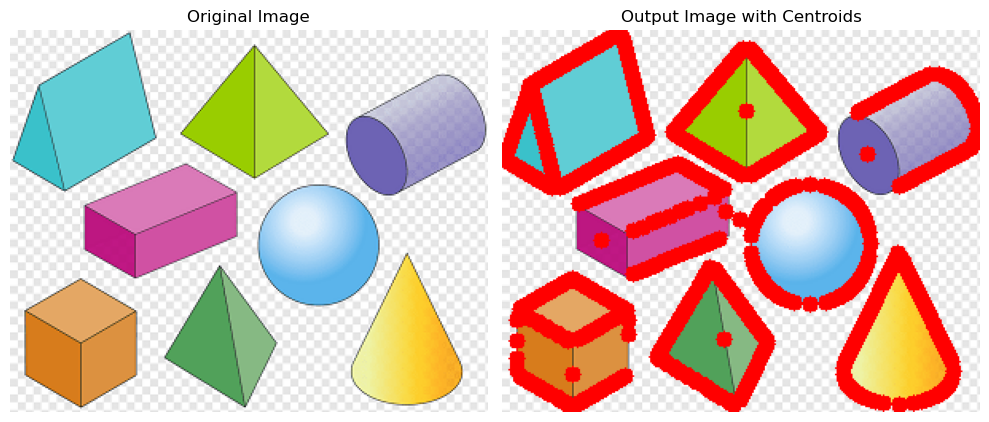

Shape Coordinates: [(149, 119), (249, 235), (145, 235), (46, 235), (41, 235), (258, 234), (239, 234), (143, 234), (48, 234), (40, 234), (263, 233), (234, 233), (50, 233), (38, 233), (266, 232), (231, 232), (149, 232), (141, 232), (51, 232), (36, 232), (268, 231), (228, 231), (138, 231), (53, 231), (271, 230), (226, 230), (150, 230), (137, 230), (55, 230), (34, 230), (273, 229), (224, 229), (135, 229), (57, 229), (31, 229), (274, 228), (223, 228), (151, 228), (133, 228), (58, 228), (29, 228), (276, 227), (221, 227), (132, 227), (60, 227), (28, 227), (277, 226), (220, 226), (152, 226), (130, 226), (62, 226), (26, 226), (278, 225), (219, 225), (63, 225), (24, 225), (279, 224), (218, 224), (153, 224), (128, 224), (65, 224), (23, 224), (280, 223), (217, 223), (67, 223), (21, 223), (216, 222), (154, 222), (125, 222), (69, 222), (19, 222), (281, 221), (122, 221), (70, 221), (17, 221), (215, 220), (155, 220), (72, 220), (16, 220), (282, 219), (120, 219), (74, 219), (14, 219), (156, 218), (117,

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_shape_coordinates(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # List to store the coordinates of the shapes
    coordinates = []

    # Loop over the contours to calculate the center (centroid) of each shape
    for cnt in contours:
        moments = cv2.moments(cnt)
        if moments['m00'] != 0:
            # Calculate the x and y coordinates of the centroid
            cx = int(moments['m10'] / moments['m00'])  # X coordinate
            cy = int(moments['m01'] / moments['m00'])  # Y coordinate
            coordinates.append((cx, cy))  # Add the coordinates to the list

    return coordinates, contours

# Load image
image_path = 'shapes.png'  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Detect shape coordinates
coordinates, contours = detect_shape_coordinates(image)

# Draw the contours and the coordinates (centroids) on the image
output_image = image.copy()
for (cx, cy) in coordinates:
    cv2.circle(output_image, (cx, cy), 5, (0, 0, 255), -1)  # Draw centroid in red

# Display the original and output images in a grid
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title("Original Image")
plt.axis('off')

# Output Image with Centroids
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title("Output Image with Centroids")
plt.axis('off')

plt.tight_layout()
plt.show()

# Output the detected coordinates
print("Shape Coordinates:", coordinates)


### ✨ **Subprogram 2: Compute Area** ✨

In **Subprogram 2**, we calculate the areas of shapes detected in the given image. This involves several steps, including converting the image to grayscale, thresholding, finding contours, and calculating the area for each contour using OpenCV. The areas are then displayed on the image for easy visualization. 🖼️🔢

**Step-by-Step Process** 🏃‍♂️:

1. **Convert the image to grayscale**: 🎨
   - We transform the image into grayscale to simplify the processing.
  
2. **Apply a binary threshold**: ⚪⚫
   - The image is thresholded, turning it into a binary image, where pixels are either black or white.

3. **Find the contours**: 🧭
   - We detect the outlines of shapes using contours.

4. **Calculate the area of each contour**: 📏
   - Using `cv2.contourArea`, we compute the area for each detected shape.

5. **Display the areas on the image**: 👀
   - The calculated areas are overlayed on the original image for visualization.

Here’s the code implementation:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_area(image):
    """
    This function calculates the area of the shapes detected in the input image.
    It works by finding the contours of the shapes and calculating the area
    using the contourArea method provided by OpenCV.

    Args:
    - image (numpy.ndarray): The input image in which the shapes' areas need to be computed.

    Returns:
    - areas (list): A list of areas of each detected shape.
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a binary threshold to get a binary image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # List to hold the areas of detected shapes
    areas = []
    
    # Loop over all contours and compute the area
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 0:  # Ignore very small contours or noise
            areas.append(area)
    
    return areas

def display_image_with_areas(image, areas):
    """
    Display the input image and overlay the areas of detected shapes.

    Args:
    - image (numpy.ndarray): The input image.
    - areas (list): The list of areas to overlay on the image.
    """
    output_image = image.copy()
    
    # Convert the image to grayscale for contour finding
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw the contours and overlay the area on the image
    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area > 0:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.putText(output_image, f"Area: {int(area)}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            cv2.drawContours(output_image, [cnt], -1, (0, 255, 0), 2)  # Green contour
            
    # Display the original image and the output image with areas
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Original Image")
    plt.axis('off')

    # Output Image with Areas
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Image with Areas")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to demonstrate area calculation
if __name__ == "__main__":
    image_path = 'shapes_and_colors.jpg'  # Replace with your image path
    image = cv2.imread(image_path)

    # 1. Compute areas
    areas = compute_area(image)
    print("Shape Areas:", areas)

    # 2. Display image with areas
    display_image_with_areas(image, areas)
```

### 📸 **Output**:

- **Original Image**: This is the raw image where the shapes exist.
- **Image with Areas**: Here, the calculated areas are displayed on the image for visualization.

---

### 🖼️ **Use Case**:

- This code is ideal for images that contain well-defined shapes with clear contours (e.g., geometric shapes, labeled objects in images).
- It can be used in applications such as image analysis, shape recognition, and measuring the size of objects in an image.

### ⚠️ **Limitation**:

- The method may not work well with complex or blurred images where contours are not easily detectable.


Shape Areas: [50.0, 20.0, 77.0, 26.5, 64.0, 32.0, 1524.5, 1513.5, 76.5, 25.0, 44.0, 10.0, 5986.0, 4164.0, 39.0, 29.0, 57.0, 34.0, 8349.0, 14.0, 28.5, 28.0, 10.0, 24.5, 6371.5, 15.5, 41.0, 19.5, 273.5, 24.5, 4419.0, 9245.5, 4463.5, 10104.5, 8715.0, 4433.0, 23.5, 2.0, 2.0, 16.0, 38.5, 16.0, 36.0, 4695.0, 6216.5, 4686.5, 6321.5, 4414.5, 8314.5, 10081.0, 4450.0, 9083.0, 1115.5, 3276.0, 6314.0, 6315.0, 4304.5, 4703.5, 127.5, 4322.0, 4321.0, 8173.0, 6314.0, 8318.0, 6322.5, 6324.5, 4122.0, 4436.5, 500.5, 4697.0, 6223.5, 4408.5, 6378.0, 6219.5, 10056.5, 4456.5, 9264.5, 148.0, 895.0, 2836.0, 271.0, 2840.0]


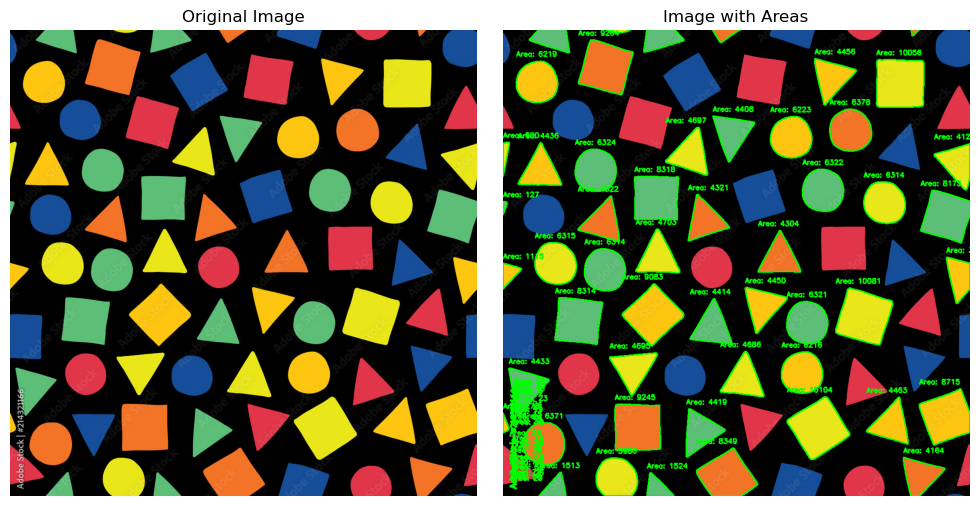

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_area(image):
    """
    This function calculates the area of the shapes detected in the input image.
    It works by finding the contours of the shapes and calculating the area
    using the contourArea method provided by OpenCV.

    Args:
    - image (numpy.ndarray): The input image in which the shapes' areas need to be computed.

    Returns:
    - areas (list): A list of areas of each detected shape.
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a binary threshold to get a binary image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # List to hold the areas of detected shapes
    areas = []
    
    # Loop over all contours and compute the area
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 0:  # Ignore very small contours or noise
            areas.append(area)
    
    return areas

def display_image_with_areas(image, areas):
    """
    Display the input image and overlay the areas of detected shapes.

    Args:
    - image (numpy.ndarray): The input image.
    - areas (list): The list of areas to overlay on the image.
    """
    output_image = image.copy()
    
    # Convert the image to grayscale for contour finding
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw the contours and overlay the area on the image
    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area > 0:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.putText(output_image, f"Area: {int(area)}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            cv2.drawContours(output_image, [cnt], -1, (0, 255, 0), 2)  # Green contour
            
    # Display the original image and the output image with areas
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Original Image")
    plt.axis('off')

    # Output Image with Areas
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Image with Areas")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to demonstrate area calculation
if __name__ == "__main__":
    image_path = 'shapes and colors.jpg'  # Replace with your image path
    image = cv2.imread(image_path)

    # 1. Compute areas
    areas = compute_area(image)
    print("Shape Areas:", areas)

    # 2. Display image with areas
    display_image_with_areas(image, areas)



---

# 🎯 **Subprogram 3: Detect Only Red Circles** 🎯

### 🖼️ **Objective:**  
This subprogram is designed to **detect red circles** in an image using a combination of **color filtering** and **Hough Circle Transform**.

---

### 🛠️ **How It Works:**

1. **Convert to HSV Color Space** 🌈  
   The first step is to convert the input image from BGR (Blue-Green-Red) to **HSV (Hue-Saturation-Value)** color space. This is done because the HSV color space is better for color detection, especially when it comes to isolating specific colors like **red**.

2. **Red Color Masking** 🟥  
   We define two ranges for detecting **red color** in the HSV space:
   - The first range captures the **lower red shades**.
   - The second range captures the **upper red shades**.
   
   These two masks are then combined to cover the full spectrum of red shades in the image. 🌟

3. **Circle Detection with Hough Transform** 🔵  
   After isolating the red regions, the image is converted to **grayscale** to prepare it for circle detection. We use **Hough Circle Transform** to detect circles in the red regions. The algorithm finds the **edges** and **radius** of the circles, allowing us to detect **red circles** accurately. 🎯

4. **Overlaying Detected Circles** 🔴  
   Finally, the detected red circles are drawn on the original image using **green circles** to highlight their positions and radii.

---

### 🖥️ **Code Implementation:**  
Here’s the code for detecting only **red circles** in the image:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_red_circles(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([179, 255, 255])
    
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = mask1 + mask2  # Combine both red masks

    red_region = cv2.bitwise_and(image, image, mask=red_mask)
    
    gray = cv2.cvtColor(red_region, cv2.COLOR_BGR2GRAY)
    
    circles = cv2.HoughCircles(
        gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=100
    )
    
    return circles

def display_detected_circles(image, circles):
    output_image = image.copy()
    
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        
        for (x, y, r) in circles:
            cv2.circle(output_image, (x, y), 2, (0, 255, 0), 3)
            cv2.circle(output_image, (x, y), r, (0, 255, 0), 3)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title("Red Circles Detected")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
```

---

### 🖼️ **Output:**

After running the program, you’ll see:
- **Original Image** on the left.
- **Image with Detected Red Circles** on the right. The detected circles will be overlaid with **green boundaries** to highlight the positions of the red circles.

---

### 🎨 **Visual Explanation:**

- The **HSV Conversion** helps isolate the red color in the image 🎨.
- The **Hough Circle Transform** detects the **red circles** and marks them 🔴.
- The final output shows the **original image** and the **detected red circles** 🟢.

---

### 🚀 **Key Features:**
- **Red Color Detection:** The program detects red circles by filtering red hues in the image using a tailored color mask.
- **Hough Circle Transform:** Utilizes the powerful **Hough Transform** to find circles in the red regions of the image.
- **Real-Time Feedback:** The program shows real-time feedback with a side-by-side comparison of the original image and the processed result.

--- 

This is a highly effective way to detect and highlight **only red circles** in any image, allowing for a simple yet powerful detection system. 🔴

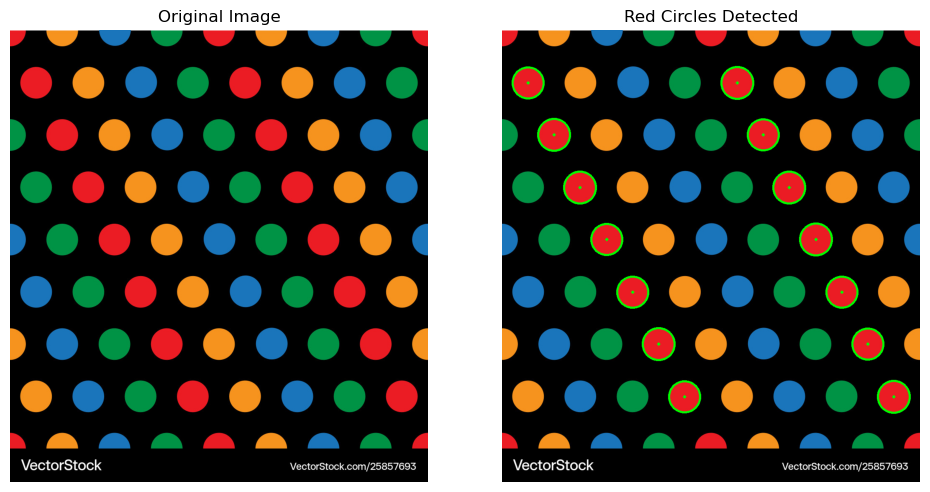

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_red_circles(image):
    """
    Detects only red circles in the given image using color filtering and Hough Circle Transform.
    
    Args:
    - image (numpy.ndarray): The input image in which the red circles need to be detected.

    Returns:
    - circles (numpy.ndarray): Array containing the detected red circles in the image.
    """
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for detecting red color in HSV space
    lower_red1 = np.array([0, 100, 100])    # Lower bound for red color
    upper_red1 = np.array([10, 255, 255])   # Upper bound for red color
    lower_red2 = np.array([160, 100, 100])  # Second range for red color
    upper_red2 = np.array([179, 255, 255])  # Upper bound for red color
    
    # Create masks for red color in the image
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = mask1 + mask2  # Combine both masks to detect all red regions
    
    # Apply the mask to the image
    red_region = cv2.bitwise_and(image, image, mask=red_mask)
    
    # Convert to grayscale for circle detection
    gray = cv2.cvtColor(red_region, cv2.COLOR_BGR2GRAY)
    
    # Detect circles using Hough Transform
    circles = cv2.HoughCircles(
        gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=100
    )
    
    return circles

def display_detected_circles(image, circles):
    """
    Display the image with the detected red circles overlaid.

    Args:
    - image (numpy.ndarray): The input image with red circles.
    - circles (numpy.ndarray): Array of detected circles to be overlaid.
    """
    output_image = image.copy()

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        
        # Draw the detected circles
        for (x, y, r) in circles:
            # Draw the circle's center
            cv2.circle(output_image, (x, y), 2, (0, 255, 0), 3)
            # Draw the circle's perimeter
            cv2.circle(output_image, (x, y), r, (0, 255, 0), 3)
    
    # Display the original and the output image
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title("Original Image")
    plt.axis('off')

    # Output Image with Detected Circles
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title("Red Circles Detected")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to demonstrate red circle detection
if __name__ == "__main__":
    image_path = 'rainbow.jpg'  # Replace with your image path
    image = cv2.imread(image_path)

    # Detect red circles in the image
    circles = detect_red_circles(image)

    # Display the image with detected red circles
    display_detected_circles(image, circles)



---

# 🌿 Subprogram 4 : **Detect All Green Shapes** 🌿

This program detects and highlights all the **green shapes** in an image by applying **color masking** and **contour detection**. We specifically target the **green color range** using the **HSV color space**, and then we find the contours of the detected green shapes and draw them onto the original image. 🎨

## 🧑‍💻 **Code Implementation**:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_green_shapes(image):
    """
    Detects all green shapes in the given image.
    Uses color masking in HSV space to isolate green shapes and contours to identify the shapes.

    Args:
    - image (numpy.ndarray): The input image to detect green shapes in.

    Returns:
    - output_image (numpy.ndarray): The image with detected green shapes highlighted.
    """
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the range for green color in HSV space
    lower_green = np.array([35, 50, 50])  # Lower bound for green
    upper_green = np.array([85, 255, 255])  # Upper bound for green
    
    # Create a mask to isolate green regions
    green_mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Apply the mask to the image
    green_region = cv2.bitwise_and(image, image, mask=green_mask)
    
    # Convert the green region to grayscale for contour detection
    gray = cv2.cvtColor(green_region, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding to get a clean binary image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours of the green shapes
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a copy of the original image to draw contours
    output_image = image.copy()
    
    # Loop through each contour and draw it on the output image
    for cnt in contours:
        cv2.drawContours(output_image, [cnt], -1, (0, 255, 0), 3)  # Draw green contours
    
    return output_image

def display_detected_shapes(image, output_image):
    """
    Display the original image and the output image with detected green shapes.
    
    Args:
    - image (numpy.ndarray): The input image.
    - output_image (numpy.ndarray): The image with detected green shapes.
    """
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Original Image")
    plt.axis('off')

    # Output Image with Detected Green Shapes
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Detected Green Shapes")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to demonstrate the detection of green shapes
if __name__ == "__main__":
    image_path = 'shapes_and_colors.jpg'  # Replace with the path to your image
    image = cv2.imread(image_path)

    # Detect green shapes
    output_image = detect_green_shapes(image)
    
    # Display original image and image with detected green shapes
    display_detected_shapes(image, output_image)
```

---

## 🔍 **How It Works**:

### 1. **HSV Color Conversion**:
   - The image is first converted from **BGR** to **HSV** color space. 🌈
   - HSV (Hue, Saturation, Value) is more suitable for color-based detection, as it separates the color intensity from the chromatic content.

### 2. **Green Color Masking**:
   - A **green color mask** is created by defining the **lower** and **upper bounds** of the green color in the HSV color space.
   - We isolate the green areas by applying this mask to the image. 🟩

### 3. **Contour Detection**:
   - The green regions are then converted to **grayscale** and thresholded to obtain a binary image.
   - Using **contour detection** (`cv2.findContours`), the program finds all the green shapes in the image.

### 4. **Drawing Green Shapes**:
   - The contours of the detected green shapes are drawn onto the **original image** with green-colored outlines. 🖊️

### 5. **Displaying Results**:
   - The original image and the image with the detected green shapes are displayed side by side using **Matplotlib** for easy comparison. 📸

---

## ⚠️ **Limitations**:

### 1. **Lighting Conditions**:
   - The effectiveness of this program depends heavily on the **lighting** of the image. Low lighting or overexposure may affect color detection. 💡

### 2. **Color Range Sensitivity**:
   - The color range for green detection is predefined. If the green shapes in the image have different shades (e.g., dark green or light green), they may not be detected unless the range is adjusted. 🎨

### 3. **Noise**:
   - **Noise** in the image can lead to false positives. If the image is too noisy, unwanted small contours might be detected as green shapes. 🧳

### 4. **Overlapping Shapes**:
   - If multiple green shapes are **overlapping** or are **too close together**, the contours may merge, leading to inaccurate shape detection. 🔴🟢

---

## 🌟 **Conclusion**:

This program is a simple yet effective solution for detecting and highlighting **green shapes** in images. It leverages **color masking** and **contour detection** techniques in **OpenCV** to identify shapes based on color. While this method is generally reliable, it’s important to fine-tune the parameters, especially the green color range, for best results under different conditions.

---


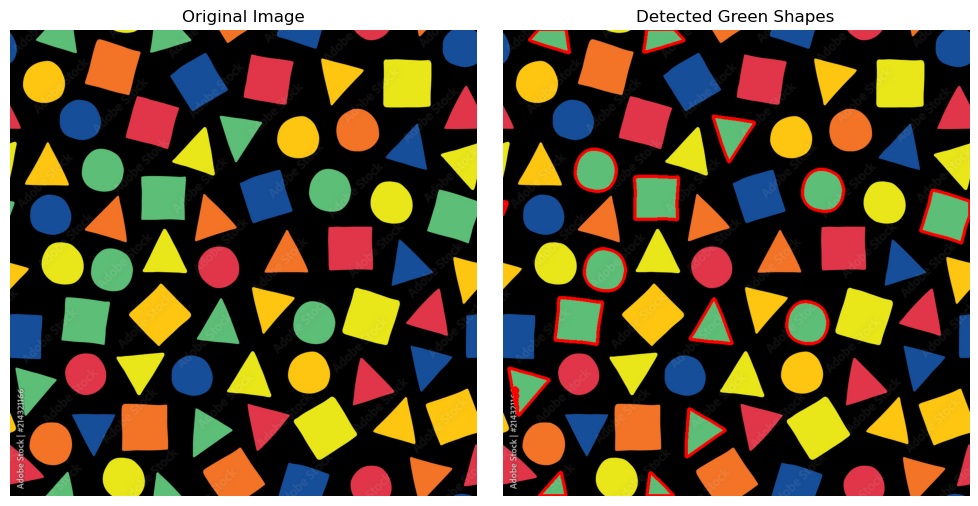

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_green_shapes(image):
    """
    Detects all green shapes in the given image.
    Uses color masking in HSV space to isolate green shapes and contours to identify the shapes.

    Args:
    - image (numpy.ndarray): The input image to detect green shapes in.

    Returns:
    - output_image (numpy.ndarray): The image with detected green shapes highlighted.
    """
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the range for green color in HSV space
    lower_green = np.array([35, 50, 50])  # Lower bound for green
    upper_green = np.array([85, 255, 255])  # Upper bound for green
    
    # Create a mask to isolate green regions
    green_mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Apply the mask to the image
    green_region = cv2.bitwise_and(image, image, mask=green_mask)
    
    # Convert the green region to grayscale for contour detection
    gray = cv2.cvtColor(green_region, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding to get a clean binary image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours of the green shapes
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a copy of the original image to draw contours
    output_image = image.copy()
    
    # Loop through each contour and draw it on the output image
    for cnt in contours:
        cv2.drawContours(output_image, [cnt], -1, (0, 0, 255), 5)  # Draw green contours
    
    return output_image

def display_detected_shapes(image, output_image):
    """
    Display the original image and the output image with detected green shapes.
    
    Args:
    - image (numpy.ndarray): The input image.
    - output_image (numpy.ndarray): The image with detected green shapes.
    """
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Original Image")
    plt.axis('off')

    # Output Image with Detected Green Shapes
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Detected Green Shapes")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to demonstrate the detection of green shapes
if __name__ == "__main__":
    image_path = 'shapes and colors.jpg'  # Replace with the path to your image
    image = cv2.imread(image_path)

    # Detect green shapes
    output_image = detect_green_shapes(image)
    
    # Display original image and image with detected green shapes
    display_detected_shapes(image, output_image)



# 🌟 **Subprogram 5: Detecting Large Circles** 🌟

## 🏆 **Overview of the Program** 🏆

In this subprogram, we **detect large circles** in an image using the **Hough Circle Transform** method. This technique helps us find circles of varying sizes, and by tweaking the **radius parameters**, we can specifically focus on detecting **large circles**. 

### 🔍 **How it Works:**
1. **Image Preprocessing**: We convert the image to grayscale to simplify the detection process.
2. **Gaussian Blur**: To reduce noise and improve the accuracy of circle detection, we apply Gaussian blur.
3. **Hough Circle Transform**: This algorithm detects circles based on edge gradients and radius.
4. **Customizable Parameters**: You can adjust the `min_radius` and `max_radius` to control the size of circles detected.

---

## 🧩 **What’s Happening Under the Hood?** 🧩

This program detects large circles by setting **minimum** and **maximum** radius values. By increasing these values, we can ensure that **only large circles** are detected, filtering out smaller ones.

- **`min_radius`**: Minimum radius of the circle.
- **`max_radius`**: Maximum radius of the circle.

---

## 💻 **The Code** 💻

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_large_circles(image, min_radius=50, max_radius=200):
    """
    Detects large circles in the input image using the Hough Circle Transform.
    Circles with radius greater than or equal to the min_radius and less than or equal to max_radius are considered large.

    Args:
    - image (numpy.ndarray): The input image to detect large circles in.
    - min_radius (int): The minimum radius of the circles to detect.
    - max_radius (int): The maximum radius of the circles to detect.

    Returns:
    - output_image (numpy.ndarray): The image with large circles highlighted.
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve circle detection
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=50, param2=30, minRadius=min_radius, maxRadius=max_radius)

    # If no circles are found, return the original image
    if circles is None:
        return image

    # Convert the circle coordinates to integers
    circles = np.round(circles[0, :]).astype("int")

    # Create a copy of the original image to draw circles on
    output_image = image.copy()

    # Draw each detected circle on the image
    for (x, y, r) in circles:
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 4)  # Draw the circle in green
        cv2.rectangle(output_image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Draw a center point

    return output_image

def display_detected_circles(image, output_image):
    """
    Display the original image and the output image with detected large circles.

    Args:
    - image (numpy.ndarray): The input image.
    - output_image (numpy.ndarray): The image with detected large circles.
    """
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Original Image")
    plt.axis('off')

    # Output Image with Detected Large Circles
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Detected Large Circles")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to demonstrate the detection of large circles
if __name__ == "__main__":
    image_path = 'shapes_and_colors.jpg'  # Replace with the path to your image
    image = cv2.imread(image_path)

    # Detect large circles with updated parameters (larger circles)
    output_image = detect_large_circles(image, min_radius=50, max_radius=200)
    
    # Display original image and image with detected large circles
    display_detected_circles(image, output_image)
```

---

## 🚀 **Running the Program** 🚀

- **Input**: An image with potential circles of varying sizes.
- **Output**: The original image and the output image with **only large circles** detected and highlighted.

---

## ⚠️ **Limitations and Considerations** ⚠️

- **Accuracy**: The accuracy of circle detection can be affected by image quality. Blurring is crucial for reducing noise, but it may also blur the circles, reducing detection accuracy.
- **Parameter Tuning**: You need to adjust `min_radius` and `max_radius` to match the size of the circles in your image. Incorrect values may miss large circles or detect unwanted smaller ones.
- **Complex Backgrounds**: In images with complex backgrounds or overlapping shapes, circle detection might not be perfect, requiring additional preprocessing steps.

---

## 💡 **Conclusion** 💡

This subprogram efficiently detects large circles by fine-tuning the **minimum** and **maximum** radius parameters. It is useful in scenarios where detecting only circles of a specific size range is essential.

---

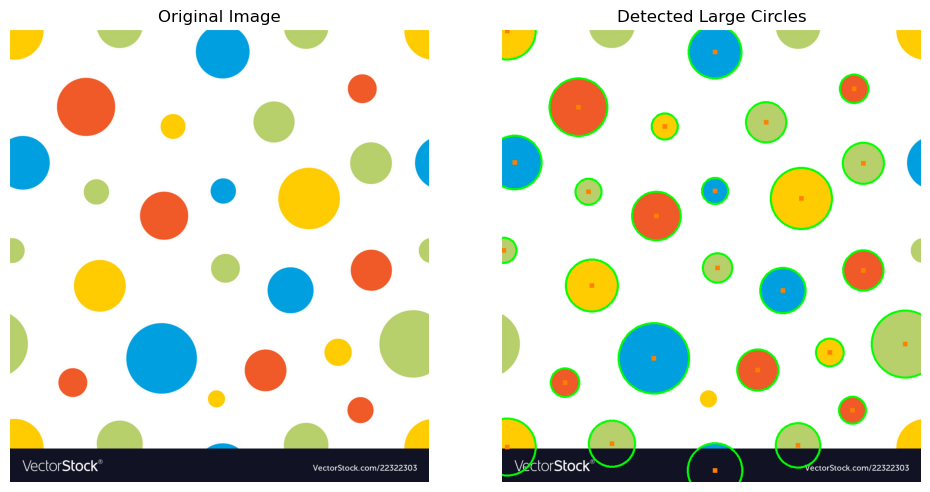

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_large_circles(image, min_radius=30, max_radius=100):
    """
    Detects large circles in the input image using the Hough Circle Transform.
    Circles with radius greater than or equal to the min_radius and less than or equal to max_radius are considered large.

    Args:
    - image (numpy.ndarray): The input image to detect large circles in.
    - min_radius (int): The minimum radius of the circles to detect.
    - max_radius (int): The maximum radius of the circles to detect.

    Returns:
    - output_image (numpy.ndarray): The image with large circles highlighted.
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve circle detection
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=50, param2=30, minRadius=min_radius, maxRadius=max_radius)

    # If no circles are found, return the original image
    if circles is None:
        return image

    # Convert the circle coordinates to integers
    circles = np.round(circles[0, :]).astype("int")

    # Create a copy of the original image to draw circles on
    output_image = image.copy()

    # Draw each detected circle on the image
    for (x, y, r) in circles:
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 4)  # Draw the circle in green
        cv2.rectangle(output_image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Draw a center point

    return output_image

def display_detected_circles(image, output_image):
    """
    Display the original image and the output image with detected large circles.

    Args:
    - image (numpy.ndarray): The input image.
    - output_image (numpy.ndarray): The image with detected large circles.
    """
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Original Image")
    plt.axis('off')

    # Output Image with Detected Large Circles
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Detected Large Circles")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to demonstrate the detection of large circles
if __name__ == "__main__":
    image_path = 'colorful-circles-seamless-background-vector-22322303.jpg'  # Replace with the path to your image
    image = cv2.imread(image_path)

    # Detect large circles
    output_image = detect_large_circles(image, min_radius=30, max_radius=100)
    
    # Display original image and image with detected large circles
    display_detected_circles(image, output_image)



# ✨ **Subprogram 6: Detecting Small Circles** 🔴

In this subprogram, we focus on detecting **small circles** in an image using the **Hough Circle Transform**. 🏁 The technique identifies circular shapes with a radius within a specific range, allowing us to isolate small circles from larger ones. 

## 🔍 **What Does This Program Do?**

This program:
- Converts the image to **grayscale** for easier processing.
- Applies a **Gaussian blur** to smooth out the image and reduce noise.
- Uses the **Hough Circle Transform** to detect circles within a specified **radius range**.
- **Highlights** detected small circles by drawing **green circles** around them and marking their **centers** with **orange squares**. 🎯

## 💻 **Code Overview**

Here is the full code that implements small circle detection:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_small_circles(image, min_radius=10, max_radius=30):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=50, param2=30, minRadius=min_radius, maxRadius=max_radius)

    # If no circles are found, return the original image
    if circles is None:
        return image

    # Convert the circle coordinates to integers
    circles = np.round(circles[0, :]).astype("int")

    # Create a copy of the original image to draw circles on
    output_image = image.copy()

    # Draw each detected circle on the image
    for (x, y, r) in circles:
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 4)  # Draw the circle in green
        cv2.rectangle(output_image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Draw a center point

    return output_image

def display_detected_circles(image, output_image):
    # Display original image and the output image with detected small circles
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper display
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper display
    plt.title("Detected Small Circles")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to demonstrate small circle detection
if __name__ == "__main__":
    image_path = 'shapes_and_colors.jpg'  # Path to your image
    image = cv2.imread(image_path)

    # Detect small circles
    output_image = detect_small_circles(image, min_radius=10, max_radius=30)

    # Display the results
    display_detected_circles(image, output_image)
```

## 🛠️ **Key Features**
- **Gaussian Blur**: Smooths the image to reduce noise for more accurate circle detection.
- **Hough Circle Transform**: A powerful algorithm for detecting circles in images.
- **Customizable Parameters**: The program allows you to adjust the **minimum** and **maximum** radius to target different circle sizes. 🔧

## ⚠️ **Limitations**
1. **Noise**: The presence of noise or cluttered backgrounds can affect the detection accuracy. It may require additional preprocessing or fine-tuning of parameters.
2. **Circle Size Sensitivity**: If the `min_radius` and `max_radius` are not set correctly, some circles might not be detected.
3. **Complex Backgrounds**: In images with complex backgrounds or overlapping objects, the circle detection might not work as expected.

## 📸 **Resulting Visuals**
The program will output two images:
1. **Original Image** - Displaying the image as it is.
2. **Detected Small Circles** - Showing circles detected within the defined size range.

Each circle will be outlined in **green**, and their centers will be marked with an **orange square**.

### 👁️‍🗨️ **Visualization**:

Both the original image and the image with detected circles will be displayed side by side for easy comparison. 📊

## 🎯 **Adjusting Parameters**:
You can tweak the values of `min_radius` and `max_radius` depending on the size of circles you're looking to detect. The program is designed to work on a wide variety of images, from simple shapes to more complex ones!

---

✨ **Enjoy exploring circles!** 🔵
---


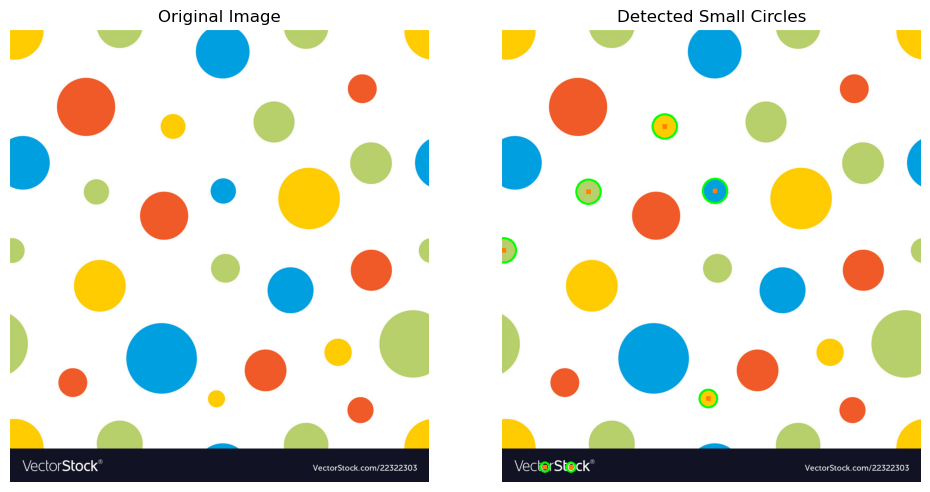

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_small_circles(image, min_radius=10, max_radius=30):
    """
    Detects small circles in the input image using the Hough Circle Transform.
    Circles with radius greater than or equal to min_radius and less than or equal to max_radius are considered small.

    Args:
    - image (numpy.ndarray): The input image to detect small circles in.
    - min_radius (int): The minimum radius of the circles to detect.
    - max_radius (int): The maximum radius of the circles to detect.

    Returns:
    - output_image (numpy.ndarray): The image with small circles highlighted.
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve circle detection
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=50, param2=30, minRadius=min_radius, maxRadius=max_radius)

    # If no circles are found, return the original image
    if circles is None:
        return image

    # Convert the circle coordinates to integers
    circles = np.round(circles[0, :]).astype("int")

    # Create a copy of the original image to draw circles on
    output_image = image.copy()

    # Draw each detected circle on the image
    for (x, y, r) in circles:
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 4)  # Draw the circle in green
        cv2.rectangle(output_image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Draw a center point

    return output_image

def display_detected_circles(image, output_image):
    """
    Display the original image and the output image with detected small circles.

    Args:
    - image (numpy.ndarray): The input image.
    - output_image (numpy.ndarray): The image with detected small circles.
    """
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Original Image")
    plt.axis('off')

    # Output Image with Detected Small Circles
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title("Detected Small Circles")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to demonstrate the detection of small circles
if __name__ == "__main__":
    image_path = 'colorful-circles-seamless-background-vector-22322303.jpg'  # Replace with the path to your image
    image = cv2.imread(image_path)

    # Detect small circles with updated parameters (smaller circles)
    output_image = detect_small_circles(image, min_radius=10, max_radius=30)
    
    # Display original image and image with detected small circles
    display_detected_circles(image, output_image)



# ✨ **Subprogram 7: Detect and Count Corners** ✨

### 🔍 **Overview**:
In this program, we detect **corners** in an image using the **Harris Corner Detection** method. Corners are important features in image processing, often used for tasks such as object recognition and motion tracking.

### 🛠 **How It Works**:
The algorithm identifies points in the image where there are significant changes in intensity in multiple directions. These points are classified as **corners**. We mark these corners with a **red color** and count the total number of detected corners.

---

### 📜 **Steps**:
1. **Convert to Grayscale**:  
   The image is first converted to grayscale because corner detection works on single-channel images.

2. **Apply Harris Corner Detection**:  
   We use **cv2.cornerHarris()**, which calculates the corner response for each pixel in the image.

3. **Thresholding**:  
   The detected corners are filtered based on a **threshold** value to identify significant corners and reduce noise.

4. **Mark Corners**:  
   The corners are marked with a **red color** on the image, making them visually distinct.

5. **Display Results**:  
   We display two images side by side: 
   - The **original image** and 
   - The **image with detected corners**.

---

### 📷 **Code Example**:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_corners(image, threshold=0.01):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Harris corner detection
    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)

    # Dilate to make the corners visible
    corners = cv2.dilate(corners, None)

    # Mark corners with red color
    output_image = image.copy()
    output_image[corners > threshold * corners.max()] = [0, 0, 255]

    # Get coordinates of corners
    corner_coords = np.column_stack(np.where(corners > threshold * corners.max()))

    return corner_coords, output_image

def display_corners(image, output_image, corner_coords):
    # Display the original and output image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Corners")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Number of detected corners: {len(corner_coords)}")
```

---

### 🧐 **Explanation of the Code**:

- **Harris Corner Detection**: The program utilizes OpenCV's `cornerHarris` function to detect corners in the image. This method calculates the corner response for each pixel, and then applies **dilation** to make the corners more visible.

- **Thresholding**: A threshold is applied to the corner response to filter out weak corners and keep only significant ones. The threshold is adjustable to suit the specific image.

- **Marking Corners**: Detected corners are marked with **red color** in the final output image.

- **Counting Corners**: The program counts the total number of corners detected and prints the result.

---

### ⚠️ **Limitations**:

1. **Noise Sensitivity**: The method is susceptible to noise in the image, which may lead to false corner detections. Image preprocessing, such as **Gaussian blurring**, can help mitigate this issue.

2. **Threshold Tuning**: The **threshold** parameter needs to be fine-tuned depending on the image quality. A lower threshold might detect too many corners, while a higher threshold may miss smaller corners.

3. **Limited to Corners**: Harris corner detection is specifically for detecting **corners**. It may not work well on edges or uniform areas where there aren't significant changes in intensity.

---

### 🏁 **Final Thoughts**:
This program is an effective way to **detect and count corners** in an image. The Harris corner detection method provides reliable results, but it requires fine-tuning for optimal performance in various image conditions. It's a key technique in many image processing tasks that involve feature detection!



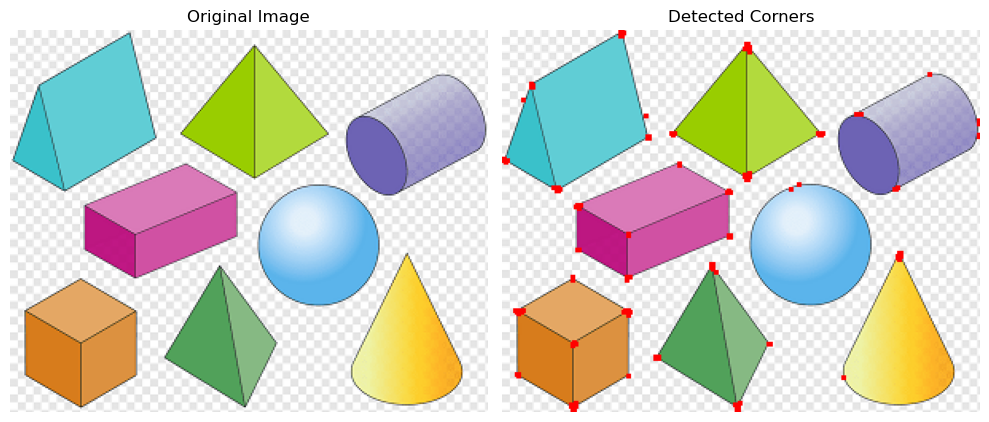

Number of detected corners: 732


In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_corners(image, threshold=0.01):
    """
    Detect corners in the image using the Harris corner detection method.

    Args:
    - image (numpy.ndarray): The input image where corners need to be detected.
    - threshold (float): The threshold to determine which points are considered corners.

    Returns:
    - corners (list): A list of detected corner coordinates.
    - output_image (numpy.ndarray): The image with corners marked.
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert to float32 for Harris corner detection
    gray = np.float32(gray)

    # Detect corners using the Harris corner detection method
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)

    # Dilate the corner points to make them visible
    corners = cv2.dilate(corners, None)

    # Create a copy of the image to mark corners
    output_image = image.copy()

    # Mark the corners on the output image
    output_image[corners > threshold * corners.max()] = [0, 0, 255]  # Red color for corners

    # Get the coordinates of the corners
    corner_coords = np.column_stack(np.where(corners > threshold * corners.max()))

    return corner_coords, output_image

def display_corners(image, output_image, corner_coords):
    """
    Display the original image and the image with detected corners.
    
    Args:
    - image (numpy.ndarray): The original image.
    - output_image (numpy.ndarray): The image with detected corners.
    - corner_coords (list): The list of corner coordinates.
    """
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper display
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper display
    plt.title("Detected Corners")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Number of detected corners: {len(corner_coords)}")

# Main function to demonstrate corner detection
if __name__ == "__main__":
    image_path = 'shapes.png'  # Path to your image
    image = cv2.imread(image_path)

    # Detect corners
    corner_coords, output_image = detect_corners(image)

    # Display results
    display_corners(image, output_image, corner_coords)



# ✂️ **Subprogram 8: Shape Segmentation and Display** 📸

In this subprogram, we focus on **segmenting individual shapes** from an image and displaying them in a grid. This is achieved using **Canny edge detection** to detect edges, followed by **contour finding** and **masking** to segment each shape.

### 🎯 **Goal**:
The goal of this subprogram is to:
1. Detect distinct shapes within an image.
2. Segment each shape and create individual images for each shape.
3. Display these segmented shapes in a clean grid layout for easier analysis.

### 🛠️ **How It Works**:
1. **Image Preprocessing**:  
   - The image is converted to **grayscale** for easier processing.
   - **Gaussian Blur** is applied to reduce noise and make edge detection more accurate.

2. **Edge Detection**:  
   - **Canny edge detection** is applied to find the edges of shapes in the image.
   
3. **Contour Finding**:  
   - The contours of the edges are extracted, which represents the boundaries of shapes.

4. **Masking**:  
   - A black mask is created for each contour, and the shape is isolated by applying the mask.
   
5. **Shape Segmentation**:  
   - Each shape is then **segmented** by applying the mask to the original image, resulting in separate images for each detected shape.

6. **Display**:  
   - The **original image** is displayed first.
   - Then, each segmented shape is displayed in a **grid** format, with 2 images per row.

---

### ✨ **Features**:
- **Image Preprocessing**: Converts to grayscale and applies Gaussian blur.
- **Edge Detection**: Uses Canny edge detection to find contours.
- **Shape Segmentation**: Isolates shapes using masks.
- **Dynamic Layout**: Displays segmented shapes in a grid, 2 per row.

---

### 📜 **Code**:
```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_shapes(image_path):
    # Read image, convert to grayscale, apply Gaussian blur, and detect edges
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    segmented_images = []
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # Minimum area to consider
            mask = np.zeros_like(image)
            cv2.drawContours(mask, [cnt], -1, (255, 255, 255), thickness=cv2.FILLED)
            segmented_image = cv2.bitwise_and(image, mask)
            segmented_images.append(segmented_image)
    
    return image, segmented_images

def display_segmented_images(original_image, segmented_images):
    num_images = len(segmented_images)
    
    # Calculate grid layout with 2 images per row
    cols = 2
    rows = (num_images // cols) + (num_images % cols > 0)
    
    plt.figure(figsize=(10, rows * 3))
    
    # Display original image first
    plt.subplot(rows + 1, cols, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    
    # Display each segmented image
    for i, seg_img in enumerate(segmented_images):
        plt.subplot(rows + 1, cols, i + 2)
        plt.imshow(cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Segment {i + 1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    image_path = 'shapes.png'
    original_image, segmented_images = segment_shapes(image_path)
    display_segmented_images(original_image, segmented_images)
```

---

### 🔍 **Example Output**:
- **First**: The **original image** is displayed.
- **Followed by**: Segmented shapes displayed in **2 per row** in a grid format.

---

### ⚙️ **Limitations**:
1. **Shape Detection**: Shapes with very small areas or noise might not be detected if the area threshold is too high.
2. **Edge Detection Sensitivity**: The parameters for **Canny edge detection** (50, 150) can be adjusted based on the image quality. Too low or too high values can either detect too many edges or miss important ones.
3. **Segment Size**: The size of shapes is constrained by the minimum area threshold (500 in this case). This can be adjusted based on the application.

### ✅ **Conclusion**:
This subprogram is effective for segmenting shapes in a given image and presenting them in an easy-to-analyze grid format. It is flexible and can be adapted for various image types and shapes by tweaking the thresholds and parameters.

---

### 📝 **Next Steps**:
- **Customization**: Adjust the contour area threshold to suit specific images.
- **Further Enhancement**: Implement color-based segmentation to detect shapes of particular colors.
```



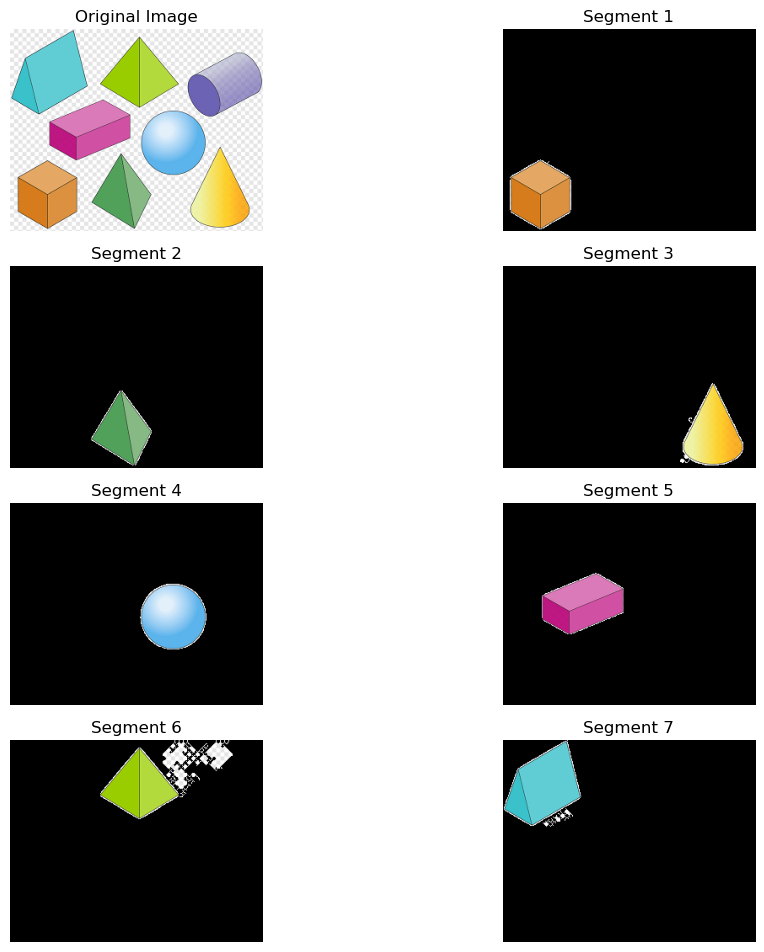

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_shapes(image_path):
    """
    This function segments all shapes from the input image and displays them in a grid.
    It uses Canny edge detection to find contours, then creates a mask for each shape.

    Args:
    - image_path (str): The path to the input image.

    Returns:
    - segmented_images (list): A list of segmented images of shapes.
    """
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred, 50, 150)  # You can adjust these values

    # Find contours from the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    segmented_images = []
    
    # Filter contours based on area
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # Only consider contours with area greater than 500 (adjust as needed)
            mask = np.zeros_like(image)  # Create a black mask
            cv2.drawContours(mask, [cnt], -1, (255, 255, 255), thickness=cv2.FILLED)  # Fill the contour in the mask
            
            # Segment the shape by applying the mask
            segmented_image = cv2.bitwise_and(image, mask)
            
            # Append the segmented shape to the list
            segmented_images.append(segmented_image)
    
    return image, segmented_images

def display_segmented_images(original_image, segmented_images):
    """
    Display the original image and the segmented shapes in a grid format.
    
    Args:
    - original_image (numpy.ndarray): The original input image.
    - segmented_images (list): List of segmented images to display.
    """
    num_images = len(segmented_images)
    
    # If no segments detected
    if num_images == 0:
        print("No significant shapes detected.")
        return
    
    # Set the number of columns to 2 (for 2 images per row)
    cols = 2
    rows = (num_images // cols) + (num_images % cols > 0)  # Calculate number of rows needed
    
    # Create the plot with the updated grid size
    plt.figure(figsize=(10, rows * 3))

    # Plot the original image first
    plt.subplot(rows + 1, cols, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title("Original Image")
    plt.axis('off')

    # Plot each segmented image in the grid
    for i, seg_img in enumerate(segmented_images):
        plt.subplot(rows + 1, cols, i + 2)
        plt.imshow(cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.title(f"Segment {i + 1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Main function to run the process
if __name__ == "__main__":
    image_path = 'shapes.png'  # Replace with your image path
    original_image, segmented_images = segment_shapes(image_path)
    display_segmented_images(original_image, segmented_images)


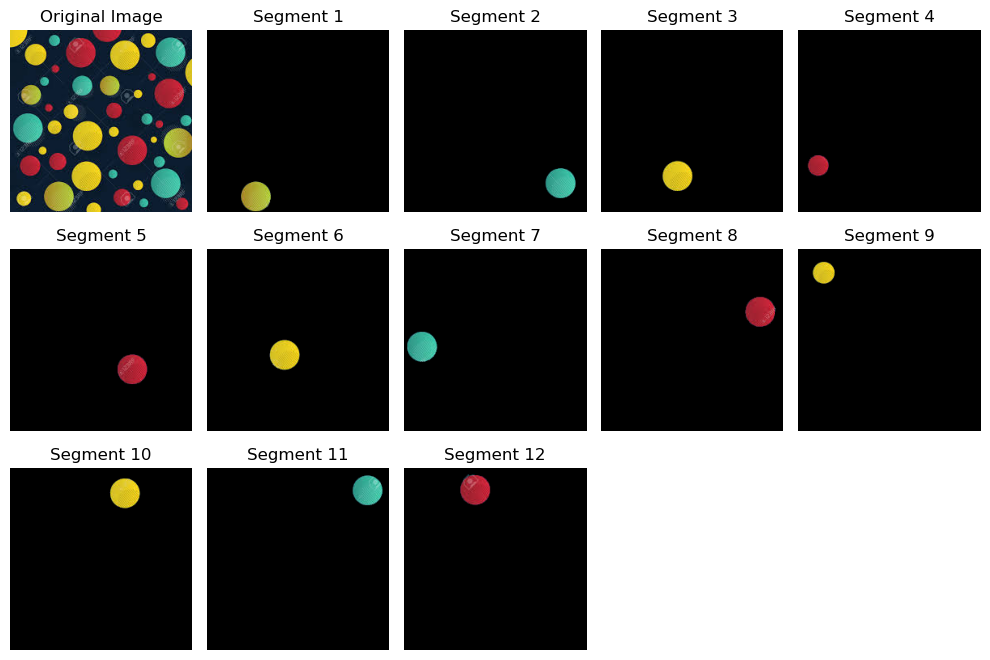

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_shapes(image_path):
    """
    This function segments all shapes from the input image and displays them in a grid.
    It uses Canny edge detection to find contours, then creates a mask for each shape.

    Args:
    - image_path (str): The path to the input image.

    Returns:
    - segmented_images (list): A list of segmented images of shapes.
    """
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred, 50, 150)  # You can adjust these values

    # Find contours from the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    segmented_images = []
    
    # Filter contours based on area
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # Only consider contours with area greater than 500 (adjust as needed)
            mask = np.zeros_like(image)  # Create a black mask
            cv2.drawContours(mask, [cnt], -1, (255, 255, 255), thickness=cv2.FILLED)  # Fill the contour in the mask
            
            # Segment the shape by applying the mask
            segmented_image = cv2.bitwise_and(image, mask)
            
            # Append the segmented shape to the list
            segmented_images.append(segmented_image)
    
    return image, segmented_images

def display_segmented_images(original_image, segmented_images):
    """
    Display the original image and the segmented shapes in a grid format.
    
    Args:
    - original_image (numpy.ndarray): The original input image.
    - segmented_images (list): List of segmented images to display.
    """
    num_images = len(segmented_images)
    
    # If no segments detected
    if num_images == 0:
        print("No significant shapes detected.")
        return
    
    # Set the number of columns to 2 (for 2 images per row)
    cols = 5
    rows = (num_images // cols) + (num_images % cols > 0)  # Calculate number of rows needed
    
    # Create the plot with the updated grid size
    plt.figure(figsize=(10, rows * 3))

    # Plot the original image first
    plt.subplot(rows + 1, cols, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title("Original Image")
    plt.axis('off')

    # Plot each segmented image in the grid
    for i, seg_img in enumerate(segmented_images):
        plt.subplot(rows + 1, cols, i + 2)
        plt.imshow(cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.title(f"Segment {i + 1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Main function to run the process
if __name__ == "__main__":
    image_path = 'images.jpg'  # Replace with your image path
    original_image, segmented_images = segment_shapes(image_path)
    display_segmented_images(original_image, segmented_images)
